In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

## Loading dataset and selecting features

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
iris_df = pd. DataFrame(X, columns=feature_names)
iris_df['target'] = y
x = iris_df.drop(columns=['target'])

In [52]:
iris_df['target'].unique()

array([0, 1, 2])

In [58]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Normalizing data

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Building model

In [67]:
# using linear regression, OLS
x_const = sm.add_constant(x)

# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x_const, y, test_size=0.2, shuffle=True)

reg = OLS(y_train,x_train)
result = reg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     392.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           5.29e-66
Time:                        21:11:42   Log-Likelihood:                 13.611
No. Observations:                 120   AIC:                            -17.22
Df Residuals:                     115   BIC:                            -3.285
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0084      0.020     50.001      0.000       0.968       1.048
x1            -0.1032      0.053     -1.958      0.053      -0.208       0.001
x2            -0.0208      0.029     -0.715      0.476      -0.078       0.037
x3             0.4495      0.110      4.092      0.000       0.232       0.667
x4             0.4349      0.081      5.399      0.000       0.275       0.595
==============================================================================
Omnibus:                        1.910   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.417
Skew:                          -0.234   Prob(JB):                        0.492
Kurtosis:                       3.255   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_const = sm.add_constant(x)

# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x_const, y, test_size=0.2, shuffle=True)

reg = OLS(y_train,x_train)
result = reg.fit()
result.summary()

## Model evaluation

In [68]:
pred = result.predict(x_test)
df_pred = pd.DataFrame({'Predicted':pred, 'Target':y_test})
df_pred

,Predicted,Target
0,1.212508,1
1,-0.086771,0
2,1.366545,1
3,1.358040,1
4,1.285826,1
5,-0.257031,0
6,1.748659,2
7,-0.017617,0
8,1.994635,2
9,1.338149,1


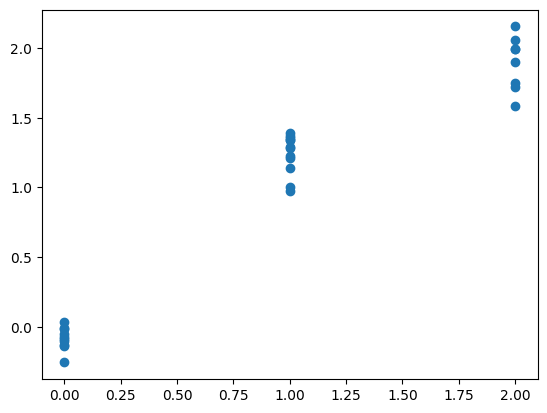

In [81]:
plt.scatter(x=df_pred['Target'], y=df_pred['Predicted'])